In [ ]:
pip install imblearn

# 1. data cleaning

In [2]:
import numpy as np
from numpy import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('training.csv')  # import data
df.head(5)  # There's a lot of missing data

,event,var1,var2,var3,var4,var5,var6,var7,var8,split,id
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,1
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,2
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev,3
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev,4


In [4]:
df.event = 1 - df.event   #change the y

In [5]:
df.drop(columns=['split','id'], inplace=True)  #drop useless columns

In [6]:
df.shape
df.isnull().sum()  # count the missing values

event         0
var1     105800
var2     121800
var3     192199
var4     160649
var5     230549
var6     232897
var7     211294
var8     137689
dtype: int64

In [7]:
df.dropna(axis=0, thresh=5, subset=None, inplace=True)  #If a piece of data has fewer than five valid features, it is abandoned

In [8]:
df.isnull().sum() # still lots of missing data

event        0
var1       542
var2      1557
var3     26788
var4     12028
var5     60993
var6     62385
var7     43743
var8      9023
dtype: int64

# 2. Missing data interpolation

In [11]:
# knn method is used to select the nearest data point to complete the vacant data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)   

In [12]:
df[['var1', 'var2','var3','var4','var5','var6','var7','var8']]= imputer.fit_transform(df[['var1', 'var2','var3','var4','var5','var6','var7','var8']])

In [13]:
#Data completion is completed
df.isnull().sum() 

event    0
var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
dtype: int64

# 3 Balancing the catagory

Class 0: 65900
Class 1: 1495
Proportion: 44.08 : 1


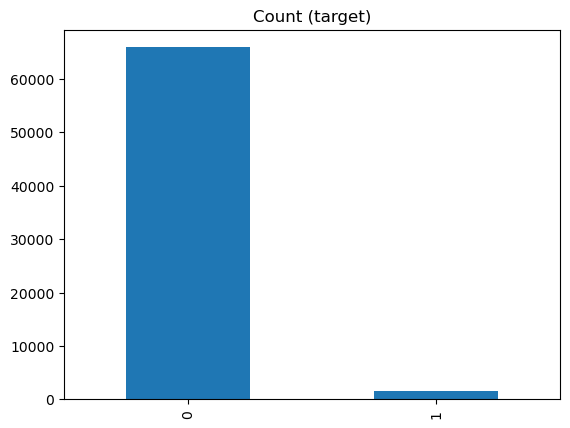

In [14]:
#There is a serious sample imbalance
target_count = df.event.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

<AxesSubplot:>

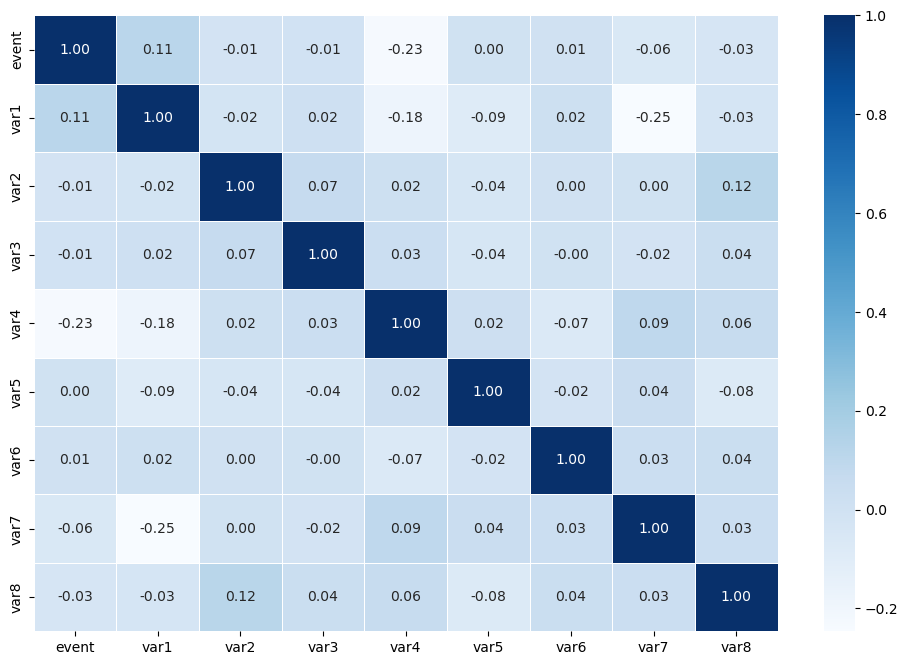

In [15]:
#The correlation coefficient between each variable is relatively low,
#so it can be considered that there is no autocorrelation problem
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap = "Blues", linewidths=.5, fmt= '.2f')

In [16]:
df.info

<bound method DataFrame.info of         event  var1          var2       var3  var4         var5       var6  \
11          0   2.0  7.522327e+06   1.163336  13.0    16.776424   0.817079   
12          0   1.0  5.661878e+05   0.646621  13.0    15.099761   1.323552   
14          0  13.0  8.810127e+03  32.630887  13.0    19.338189   0.914177   
15          0   1.0  1.194820e+06   6.116923  12.0     4.893348   0.016672   
18          0   1.0  8.041781e+05   4.453691  13.0  1378.587803   0.262387   
...       ...   ...           ...        ...   ...          ...        ...   
238821      0   1.0  2.401630e+06   2.188121  13.0  1380.791034   0.323121   
238823      0   1.0  3.089737e+05   3.787257  11.9   210.209482   2.428439   
238825      0   1.0  7.391670e+02   0.513215  13.0    20.184979  86.792445   
238828      0   1.0  6.145814e+03   9.292112  13.0   268.283799  -0.130987   
238834      0   1.0  8.880325e+05   3.213000  13.0  1383.298206   7.258782   

        var7       var8  
11   

In [17]:
#Divide the training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size = 0.3,random_state = 131,stratify = df['event'])

In [18]:
y_train = train.loc[:,'event']
X_train = train.loc[:,train.columns != 'event']

                        
y_test = test.loc[:,'event']
X_test = test.loc[:,train.columns != 'event']

In [19]:
#Use the smote method to solve the problem of  sample imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

X_trian: 47176 
 X_train_sm 92260
Class 0: 46130
Class 1: 46130
Proportion: 1.0 : 1


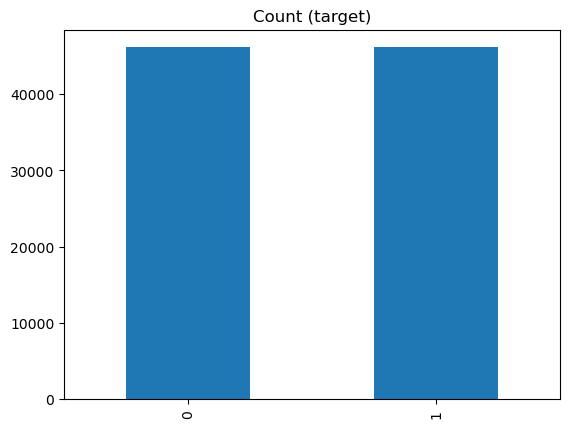

In [20]:
#after over-sampling， There's more data and it's more balanced
print("X_trian:",len(X_train),"\n","X_train_sm",len(X_train_sm))
target_count = y_train_sm.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# 4.Predict with random forest model

In [21]:
#The random forest model was used for training
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

[0.17016298 0.12285515 0.06002659 0.29490114 0.1320358  0.05863672
 0.09637099 0.06501063]


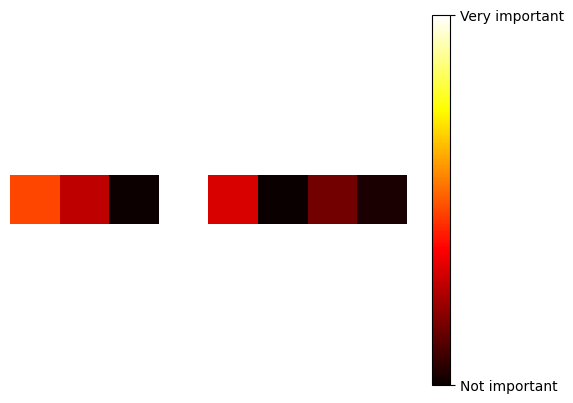

In [22]:
#The importance of each variable is shown in the form of a thermal map
import matplotlib as mpl
def plot_digit(data):
    image=data.reshape(1,8)  
    plt.imshow(image,cmap=mpl.cm.hot,interpolation="nearest")   #Plot a heat map
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)  
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()]) 
cbar.ax.set_yticklabels(['Not important', 'Very important'])
print(rnd_clf.feature_importances_)

In [30]:
# count F1-score
# coutn Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = rnd_clf.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred,average='macro'))
print("Recall score:",recall_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred))


Accuracy_score: 0.9581087096295564
F1_score: 0.5687036122607749
Recall score: 0.17817371937639198
Precision score: 0.14336917562724014


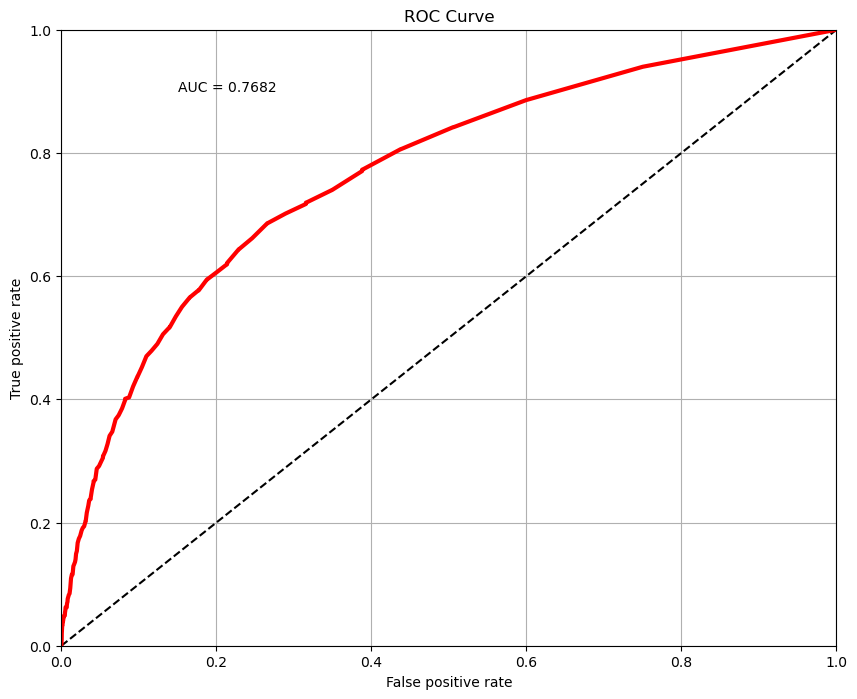

In [31]:
# get the ROC curve and AUC
from sklearn.metrics import roc_curve, auc
y_pred = rnd_clf.predict_proba(X_test)[:, 1]
fpr_Nb, tpr_Nb, _ = roc_curve(y_test, y_pred)
aucval = auc(fpr_Nb, tpr_Nb)    
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Nb, tpr_Nb,"r",linewidth = 3)
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("ROC Curve")
plt.text(0.15,0.9,"AUC = "+str(round(aucval,4)))
plt.show()

# 5.Predict with SVM

In [47]:
from sklearn.linear_model import LogisticRegression
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
log_reg= GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  n_jobs=-1)
log_reg=LogisticRegression()
log_reg.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [48]:
# predicted proability
train_pred = log_reg.predict_proba(X_train)[:,1]
test_pred = log_reg.predict_proba(X_test)[:,1]
test_predTag = log_reg.predict(X_test)

In [49]:
# calculate F1-score
# calculate accuracy
# calculate recall
# calculate precision
print(f1_score(y_test, test_predTag))
print(accuracy_score(y_test, test_predTag))
print(recall_score(y_test, test_predTag))
print(precision_score(y_test, test_predTag))

0.0
0.9777931648449478
0.0
0.0


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))  #核技巧由svc类实现 coef0控制其受高阶项影响程度
 ])
poly_kernel_svm_clf.fit(X_train_sm,y_train_sm)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [55]:
# count F1-score
# coutn Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = poly_kernel_svm_clf.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test, y_pred))
print("F1_score:",f1_score(y_test, y_pred,average='macro'))
print("Recall score:",recall_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred))

Accuracy_score: 0.8370839309560315
F1_score: 0.524539056633159
Recall score: 0.5924276169265034
Precision score: 0.07876813740005922
